<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:20px; background-color:#C70039;font-weight: bold;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:1px 15px;">House Price Prediction : Advance Regression Analysis</p> 

    This is the Continuation of the Project House Price Prediction. In the previous Part we have completed half of the Life Cycle. This chapter is purely based on building Predictive Models. Earlier after collecting the Raw dataset we have performed multiple steps and made the data ready for Machine Learning.
    1. Data Profiling - Basic Understanding of the dataset by overviewing the Description and Information
        (i)   Mising Value Identification
        (ii)  Check for Redundancy
        (iii) Outlier Identification
    2. Exploratory Data Analysis
        (i)  Analysis of DataTime DataTypes
        (ii) Analysis of Numerical Discrete Datatypes
        (iii)Analysis of Numerical Continous DataTypes
        (iv) Multivariate Analysis to understand hidden price Trends with the Features.
        (v)  Analysis of Categorical Variables
        (vi) Heat Map for MultiColinearity
        (vi) Pearson Chi-Square Test to check the relationship of the Categorical Feature with the Target Feature
    3. Data Preprocessing
        (i)  Dropped the Unwanted Features which have more than 90% Null values and have High Imbalance in the dataset.
        (ii) Imputation of the Null values
    4. Feature Engineering
        (i)   New Feature Creation from the existing to reduce complexity 
        (ii)  Create New Feature from continous variable to increase the relationship with the Target Variable
        (iii) Skewness for Outlier Treatment
        (iv)  Encoding - 
            (a) Ordinal Encoder - Which have ordered values in the columns
            (b) One Hot Encoding - For other Categorical Features
    
    Now we are have the preprocessed data which is to be used for building Predictive models using various Machine Learning Algorithms.
    
* [1. IMPORT LIBRARIES & DATASET](#1)
* [2. TRAIN TEST SPLIT](#2)
* [3. PERFORMANCE METRICS](#3)
* [4. MODEL BUILDING](#4) 
* [5. MODEL TUNING](#5)
* [6. FEATURE ENGINEERING](#6)
* [7. MACHINE LEARNING](#7)

<a id = "1">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">1 | IMPORT LIBRARIES & DATASET
    </span>
</h1>

## 1.1 Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.2 Import dataset

In [49]:
#importing the processed dataset which is ready for Machine Learning
train = pd.read_csv('training_dataset.csv', index_col=0)
test = pd.read_csv('testing_dataset.csv', index_col=0)

In [50]:
data_train = train.copy()
data_test = test.copy()

<a id = "2">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">2 | TRAIN TEST SPLIT
    </span>
</h1>

In [52]:
X=train.drop('SalePrice', axis=1)
Y=train['SalePrice']

In [53]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<a id = "3">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">3 | PERFORMANCE METRICS
    </span>
</h1>

`Mean Absolute Error` - The mean absolute error is the modulus value of the difference between the actual value and the predicted value. The MAE gives us the average of the errors. Hence machine learning model with minimum MAE should be considered as a good model since its giving minimum error
<br>
$$ MAE =  \frac{1}{n} \sum_{n} |{{Y}_{i} - \hat{Y}_{i}}|$$
Where ${{Y}_i}$ - Actual Value and $\hat {{Y}_i}$ - Predicted Value

`Mean Square Error` - MSE represents the difference between the original and predicted values extracted by squared the average difference over the data set.
$$ MSE = {\frac{1}{n} \sum_{n} ({{Y}_{i} - \hat{Y}_{i}})^2}$$


`Root Mean Square Error` - RMSE is the most commonly used measure for evaluating the quality of Prediction. It indicates the absolute fit of the model to the data and provide average model prediction error in the units of variable of interest.
$$ RMSE = \sqrt{\frac{1}{n} \sum_{n} ({{Y}_{i} - \hat{Y}_{i}})^2}$$

`Co-Efficient of determination` - This is also known as ${R}^{2}$ ranges between 0 and 1 that measures how well a statistical model predicts an outcome.
<br> **${R}^{2}$ = 0 :**                  The model doesnot predict well
<br> **${R}^{2}$ between 0 and 1 :**      The model partialy predict well. The assumptions are not well balanced
<br> **${R}^{2}$ = 1**                    The model perfectly predicts the outcome.    

<a id = "4">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">4 | MODEL BUILDING
    </span>
</h1>

In [54]:
# list to store the performance metrics
train_mae=[]
test_mae=[]
train_mse=[]
test_mse=[]
train_rmse=[]
test_rmse=[]
train_r2=[]
test_r2=[]

In [55]:
models = [LinearRegression(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          KNeighborsRegressor(), 
          GradientBoostingRegressor(),
          XGBRegressor(booster='gbtree', learning_rate=0.1, objective='reg:squarederror', random_state=0),
          Lasso(),
          Ridge(alpha=1.0)]
model_name = ['Linear', 'DecisionTree', 'RandomForest', 'KNN', 'GradientBoost', 'XGBoost', 
              'Lasso', 'Ridge']

In [56]:
for model in models:
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(x_test)
    
    train_mae.append(round(mean_absolute_error(Y_train, y_train_pred),2))
    test_mae.append(round(mean_absolute_error(y_test, y_test_pred),2))
    
    train_mse.append(round(mean_squared_error(Y_train, y_train_pred),2))
    test_mse.append(round(mean_squared_error(y_test, y_test_pred),2))
    
    train_rmse.append(round(math.sqrt(mean_squared_error(Y_train, y_train_pred)),2))
    test_rmse.append(round(math.sqrt(mean_squared_error(y_test, y_test_pred)),2))
    
    train_r2.append(r2_score(Y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

In [57]:
#Dataframe to compare the R_Square value of different models
model_df = pd.DataFrame({'Model':model_name, 'Train_MAE':train_mae,'Test_MAE':test_mae,
                         'Train_MSE':train_mse,'Test_MSE':test_mse, 
                         'Train_RMSE':train_rmse,'Test_RMSE':test_rmse,
                         'Train_R2Sq':train_r2, 'Test_R2Sq':test_r2}, 
                        columns=['Model', 'Train_MAE','Test_MAE', 
                                 'Train_MSE','Test_MSE','Train_RMSE','Test_RMSE','Train_R2Sq', 'Test_R2Sq'])


In [58]:
model_df

,Model,Train_MAE,Test_MAE,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_R2Sq,Test_R2Sq
0,Linear,17124.98,22067.06,7.302975e+08,1.425553e+09,27024.02,37756.50,0.880274,0.790020
1,DecisionTree,7.34,27596.37,2.751957e+04,2.509702e+09,165.89,50096.92,0.999995,0.630328
2,RandomForest,6645.69,17358.83,1.311657e+08,9.212235e+08,11452.76,30351.66,0.978497,0.864306
3,KNN,17274.87,21201.39,7.738383e+08,1.340737e+09,27817.95,36616.07,0.873136,0.802513
4,GradientBoost,10573.08,16331.93,2.007954e+08,6.869907e+08,14170.23,26210.51,0.967081,0.898808
5,XGBoost,4082.50,16703.26,3.087600e+07,7.650254e+08,5556.62,27659.09,0.994938,0.887314
6,Lasso,17130.62,22041.95,7.303329e+08,1.422270e+09,27024.67,37713.00,0.880269,0.790503
7,Ridge,17211.02,21683.88,7.374466e+08,1.378638e+09,27155.97,37130.02,0.879102,0.796930


## Let's Check which model is performing best from Cross Validation.

In [66]:
scores = []    # list to store the scores
mean_scores = []

In [67]:
for model in models:
    scores.append(cross_val_score(model, X_train, Y_train, cv=10, scoring='r2'))

In [68]:
cv_df_model = pd.DataFrame({'Linear':scores[0], 'DT':scores[1], 'RF':scores[2],
                   'KNN':scores[3],'GradientBoost':scores[4] , 
                   'XGBoost':scores[5],'Lasso':scores[6],'Ridge':scores[7]})
cv_df_model.index = cv_df_model.index+1
cv_df_model.loc['Mean']=cv_df_model.mean()
cv_df_model

,Linear,DT,RF,KNN,GradientBoost,XGBoost,Lasso,Ridge
1,-4.608423e+24,0.661327,0.873893,0.841575,0.905659,0.894437,0.842737,0.845352
2,-3.046163e+24,0.653271,0.729263,0.716817,0.577157,0.600983,0.721941,0.725962
3,8.116001e-01,0.576790,0.852357,0.834311,0.867123,0.855161,0.811678,0.814568
4,-4.125004e+24,0.751846,0.910258,0.854884,0.913054,0.903764,0.936370,0.936347
5,8.847378e-01,0.600248,0.876489,0.829165,0.873289,0.870122,0.885240,0.893676
6,7.900827e-01,0.690537,0.847000,0.792289,0.842746,0.857240,0.789786,0.786741
7,8.398652e-01,0.698994,0.856687,0.864583,0.881626,0.849563,0.840127,0.842064
8,8.469389e-01,0.666045,0.874222,0.750164,0.900339,0.898230,0.847576,0.852683
9,8.990051e-01,0.703072,0.893237,0.822147,0.923078,0.897392,0.899034,0.900615
10,8.327061e-01,0.790692,0.878638,0.797910,0.879194,0.893641,0.833161,0.837202


In [69]:
cv_df_model.drop(['Linear','DT'], axis=1, inplace=True)

In [70]:
cv_df_model

,RF,KNN,GradientBoost,XGBoost,Lasso,Ridge
1,0.873893,0.841575,0.905659,0.894437,0.842737,0.845352
2,0.729263,0.716817,0.577157,0.600983,0.721941,0.725962
3,0.852357,0.834311,0.867123,0.855161,0.811678,0.814568
4,0.910258,0.854884,0.913054,0.903764,0.936370,0.936347
5,0.876489,0.829165,0.873289,0.870122,0.885240,0.893676
6,0.847000,0.792289,0.842746,0.857240,0.789786,0.786741
7,0.856687,0.864583,0.881626,0.849563,0.840127,0.842064
8,0.874222,0.750164,0.900339,0.898230,0.847576,0.852683
9,0.893237,0.822147,0.923078,0.897392,0.899034,0.900615
10,0.878638,0.797910,0.879194,0.893641,0.833161,0.837202


Text(0.5, 0, 'K-th Fold')

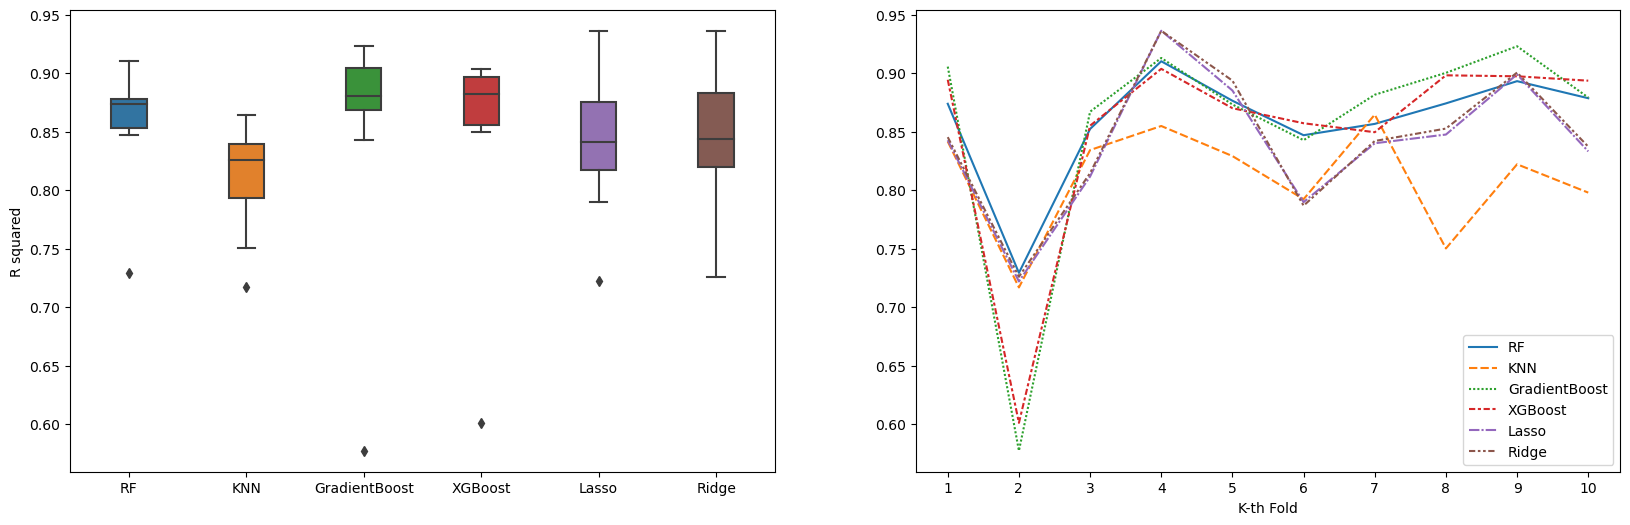

In [71]:
f,ax=plt.subplots(1,2, figsize=(20,6))

sns.boxplot(data=cv_df_model.drop(cv_df_model.tail(1).index), width=0.3, ax=ax[0])
ax[0].set_ylabel('R squared')

sns.lineplot(data=cv_df_model.drop(cv_df_model.tail(1).index), ax=ax[1])

ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

**After Performing CrossValidation Technique, Most of the Model is Performing well except `DecisionTree`, `KNN`. So we can now try Hypertuning Parameter and GridSearchCV to increase the accuracy of the Prediction**

<a id = "5">
</a>
<h1 id="Import Libraries">
    <span class="label label-default" style="background-color:#00008b; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">5 | MODEL TUNING
    </span>
</h1>

In [72]:
models[4]

GradientBoostingRegressor()

In [73]:
# Importing the libraries for GridSearchCV & tuning Hyper Parameter

In [74]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_log_error

### What are the parameters of the Model : XGBoostRegressor currently in use?

In [75]:
gb = models[4]   # models[4] has the GradientBoostingRegressor()

In [76]:
print('Parameters currently in use:\n')
gb.get_params()

Parameters currently in use:



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [77]:
param = {'model__n_estimators': [50,100,150,200,250,300], 
         'model__max_depth': [2,3,4,5,6]}

In [78]:
gbm_param = {'loss':['squared_error', 'absolute_error'], 
             'learning_rate': [0.01, 0.1, 1.0], 
             'n_estimators':[50,100,150,200], 
             'max_depth':[2,3,4]}

In [79]:
search = GridSearchCV(gb, gbm_param, n_jobs=-1, scoring='neg_mean_absolute_error')

In [80]:
search.fit(X_train, Y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [81]:
search.best_score_

-16862.846577250395

In [82]:
search.best_estimator_

GradientBoostingRegressor(loss='absolute_error', max_depth=4, n_estimators=200)

In [83]:
predict = search.predict(data_test)

In [84]:
predict

array([121890.22257467, 163620.71485835, 176148.35712397, ...,
       178834.37688838, 122080.59061536, 203228.1706736 ])

In [86]:
sub = pd.DataFrame({
    "Id": data_test.index,
    'SalePrice': predict
})

In [87]:
sub

,Id,SalePrice
0,1460,121890.222575
1,1461,163620.714858
2,1462,176148.357124
3,1463,190442.763209
4,1464,185667.326600
...,...,...
1454,2914,85198.188331
1455,2915,78225.530882
1456,2916,178834.376888
1457,2917,122080.590615


In [88]:
#submission file
sub.to_csv('submission.csv', index=False)